In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [47]:
iris = sns.load_dataset('iris')

In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 1. What does the distribution of petal lengths look like?
ANSWER: There are 2 clusters in the distrubution. The first is a large count at a petal_length of 1. The second seems to be normal distributed around a petal length of 4-5.

<Axes: xlabel='petal_length', ylabel='Count'>

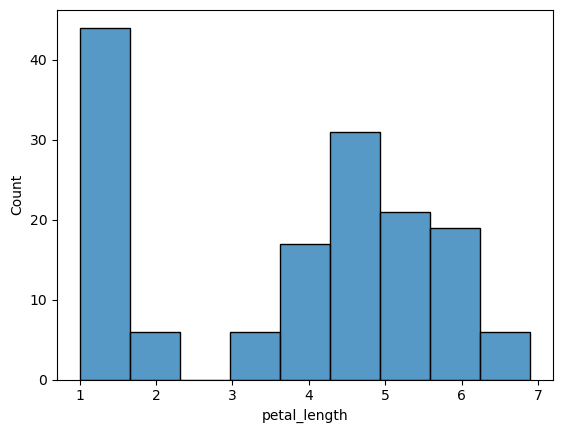

In [49]:
sns.histplot(data=iris, x='petal_length')

#### 2. Is there a relationship between petal length and petal width?
ANSWER: There does appear to be a positive linear correlation between petal length and petal width.

<Axes: xlabel='petal_length', ylabel='petal_width'>

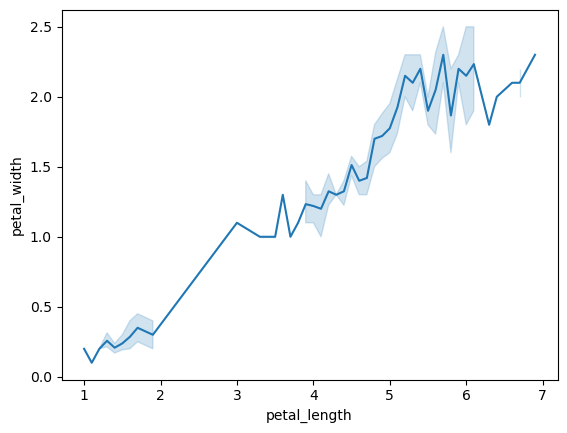

In [50]:
sns.lineplot(data=iris, x='petal_length', y='petal_width')

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
ANSWER: Yes it would be reasonable. Setosa is very clearly differentiated based on sepal length and width; while the seperation between the versicolor and virginica clusters is less distinct it would still likely be accurate to predict based on sepal width and length.

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

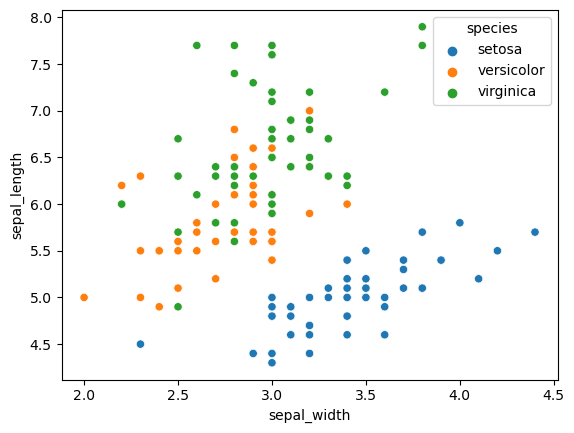

In [51]:
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

#### 4. Which features would be best used to predict species?
ANSWER: petal_width and petal_length are the best features to predict species.

<Axes: xlabel='petal_width', ylabel='petal_length'>

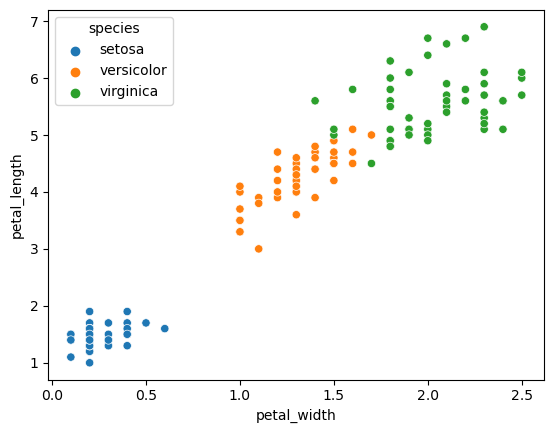

In [52]:
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species')

#### 1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

    - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [53]:
anscombe = sns.load_dataset('anscombe')
print(anscombe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


In [54]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

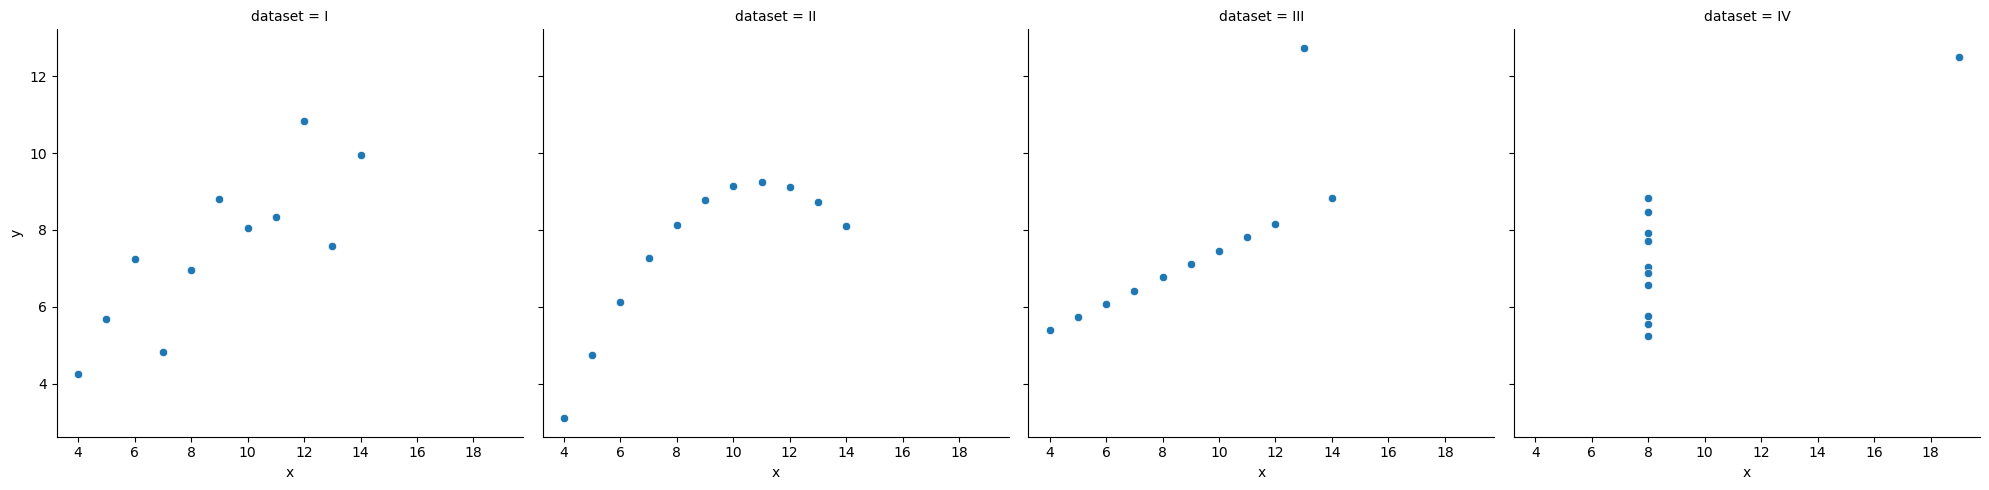

In [55]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')

#### 2. Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.



In [56]:
data('InsectSprays', show_doc=True) 
sprays = data('InsectSprays')

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<Axes: xlabel='spray', ylabel='count'>

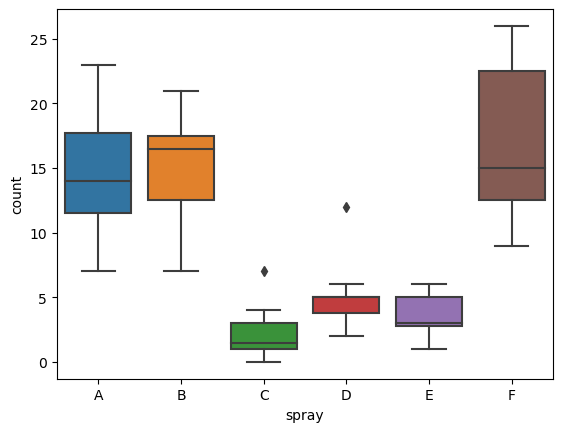

In [57]:
sns.boxplot(data=sprays, y='count', x='spray')

#### 3. Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:
    - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - Does whether or not a province is Catholic influence fertility?
    - What measure correlates most strongly with fertility?


In [58]:
data('swiss', show_doc=True) 
swiss = data('swiss')
swiss.head()

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [59]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
is_catholic = swiss['Catholic'] > 50
swiss[is_catholic]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4
Veveyse,87.1,64.5,14,6,98.61,24.5
Conthey,75.5,85.9,3,2,99.71,15.1
Entremont,69.3,84.9,7,6,99.68,19.8


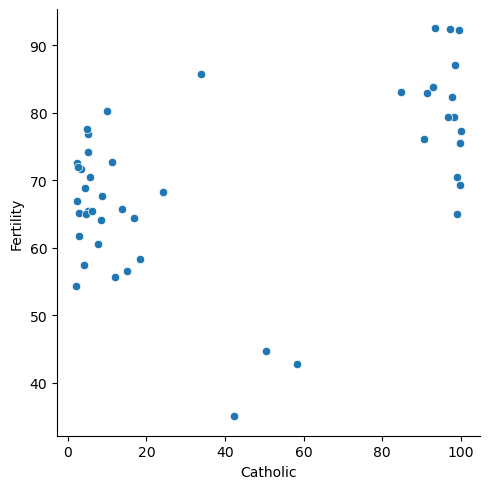

In [60]:
#     - Does whether or not a province is Catholic influence fertility?
# ANSWER: Yes. The mean fertility of Catholic Provinces was over 6% higher than the mean fertility of all provinces.
swiss['Fertility'][is_catholic].mean() - swiss['Fertility'].mean()
sns.relplot(data=swiss, y='Fertility', x='Catholic')

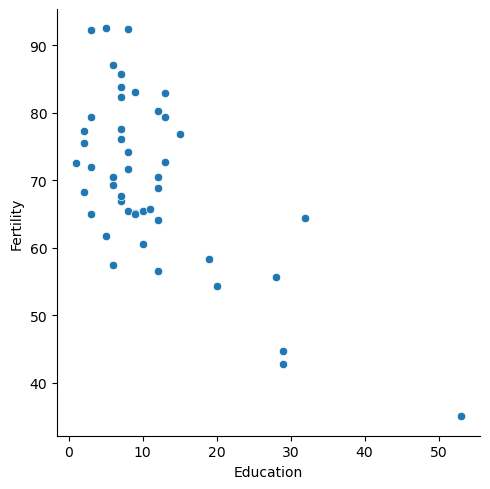

In [61]:
#    What measure correlates most strongly with fertility?
# ANSWER: Education seems to have the strongest correlation with fertility. It is a negative correlation.
sns.relplot(data=swiss, y='Fertility', x='Education')

#### 4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.



In [62]:
import env
# Create connection string with get_db_url
my_url = env.get_db_url(
    env.user,
    env.host,
    env.password,
    'chipotle')
# Write sql query
query = 'select * from orders'
# Create DataFrame
chipotle = pd.read_sql(query, my_url)

In [63]:
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [64]:
#remove special characters and change dtypes
chipotle.item_price = chipotle.item_price.str.strip('$').astype(float)

In [68]:
top_4 = chipotle.groupby('item_name').quantity.agg(['sum']).sort_values(by='sum', ascending = False).head(4)
top_4

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [69]:
all_prices = chipotle.groupby('item_name').item_price.sum()
all_prices.head()

item_name
6 Pack Soft Drink        356.95
Barbacoa Bowl            672.36
Barbacoa Burrito         894.75
Barbacoa Crispy Tacos    120.21
Barbacoa Salad Bowl      106.40
Name: item_price, dtype: float64

In [71]:
merged_df = pd.merge(top_4, all_prices, on='item_name', how='inner')
merged_df = merged_df.reset_index()
merged_df

,item_name,sum,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


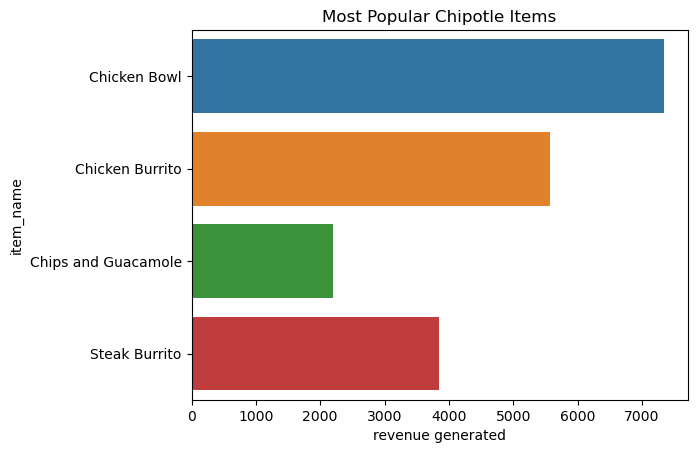

In [72]:
sns.barplot(data= merged_df, y='item_name', x='item_price')

plt.title('Most Popular Chipotle Items')
plt.xlabel('revenue generated')
plt.show()

#### 5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [65]:
data('sleepstudy', show_doc=True) 
sleep = data('sleepstudy')
sleep.columns

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

Index(['Reaction', 'Days', 'Subject'], dtype='object')

/var/folders/kj/13f127m163l12181fcrgh1vm0000gn/T/ipykernel_78929/921846953.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avg_reaction, y='Reaction', x='Days', palette='bright')


<Axes: xlabel='Days', ylabel='Reaction'>

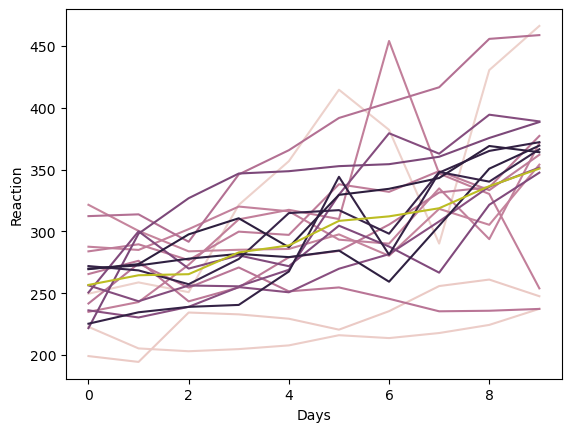

In [66]:
# Line Chart of all the individual subject's reation times
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', legend=False)
# Create a more prominant line showing the average change in reaction time:
    # Create the .agg for average reaction time
avg_reaction = sleep.groupby('Days').mean()
    # Add average to plot
sns.lineplot(data=avg_reaction, y='Reaction', x='Days', palette='bright')
